In [1]:
import pandas as pd
pd.options.display.max_columns = None # 显示所有列

In [2]:
# Read .csv
origin_data = pd.read_csv('duct.csv')
# print(origin_data.shape)
# origin_data.head()

In [3]:
# origin_data.info()

In [4]:
# Preprocessing Data

data = pd.DataFrame()

colnames = origin_data.columns # 保存原始列顺序


# 临床资料
data[['malignant','bilateral','height','weight']] = origin_data[['malignant','bilateral','height','weight']]

data['bmi'] = pd.cut(origin_data['bmi'], [0,18.5,24.0,40.0], right=False, labels=[0,1,2]).astype('int64') # 0-18.4=0, 18.5-23.9=1,24-40max=2

data[['diabetes','hypertension','surgery','smoking','family']] = origin_data[['diabetes','hypertension','surgery','smoking','family']]

data['menarche'] = pd.cut(origin_data['menarche'], [0,14,30], right=False, labels=[0,1]).astype('int64') # 0-13 =0, >13 =1

data['miscarriage'] = pd.cut(origin_data['miscarriage'], [0,1,2,10], right=False, labels=[0,1,2]).astype('int64') # 0=0, 1=1, >=2 = 2

data[ 'pregnancy'] = pd.cut(origin_data['pregnancy'], [0,1,2,10], right=False, labels=[0,1,2]).astype('int64') # 0=0, 1=1, >=2 = 2

data[ 'childbearing'] = pd.cut(origin_data['childbearing'], [0,1,2,10], right=False, labels=[0,1,2]).astype('int64') # 0=0, 1=1, >=2 = 2

data['menopause'] = origin_data['menopause']

data[['famhis2','mensperiod','menregular']] = origin_data[['famhis2','mensperiod','menregular']]

data['age'] = pd.cut(origin_data['age'], [0,35,50,100], right=False, labels=[0,1,2]).astype('int64') # 0-34=0, 35-49=1,50-100=2

data['month'] = pd.cut(origin_data['month'], [0,6,350], right=False, labels=[0,1]).astype('int64') # 0-6=0, 6-max=1,6个月为常规风险人群体检周期

# 乳管镜

data['disnature'] = [x if x!=4 else 0 for x in origin_data['disnature']] # 混合性 4 变为 0 

data[['dischange','disnumber']] = origin_data[['dischange','disnumber']]

data[['intraductalmass','position','distance']] = origin_data[['intraductalmass','position','distance']]

data[['shape','surface','status','quantity','distribution']] = origin_data[['shape','surface','status','quantity','distribution']]

data[['appearance','retraction']] = origin_data[['appearance','retraction']]

# 超声表现

data[['ductectasia','numintramass','numcysmass','nummass']] = origin_data[['ductectasia','numintramass','numcysmass','nummass']]

data[['ussize','usposition','usdistance','usshape','usboundary']] = origin_data[['ussize','usposition','usdistance','usshape','usboundary']] # 有怀疑的，按着分级最高，最怀疑的肿物来的。不怀疑的，是按着最大的来的。

data[['bloodflow','calcification','birads']] = origin_data[['bloodflow','calcification','birads']]

data['bloodflow2'] = origin_data['bloodflow2'] # 拟删除列

# 钼靶

data['xray'] = origin_data['xray']

###

data = data[colnames] # 原始列顺序

data.drop(['famhis2','bloodflow2'], axis=1, inplace=True) # 删除无意义列

data.drop(['height','weight'], axis=1, inplace=True) # 身高体重单独分析临床意义不足

data.drop(['mensperiod'], axis=1, inplace=True) # 每次月经的长短暂无理论根据

data.drop(['menregular'], axis=1, inplace=True) # 月经是否规律暂无标准

print(data.shape)

data.head(20)

(355, 41)


,malignant,bilateral,age,month,bmi,diabetes,hypertension,surgery,smoking,family,menarche,menopause,miscarriage,pregnancy,childbearing,disnature,dischange,disnumber,intraductalmass,position,distance,shape,surface,status,quantity,distribution,retraction,appearance,ductectasia,numintramass,numcysmass,nummass,ussize,usposition,usdistance,usshape,usboundary,bloodflow,calcification,birads,xray
0,1,0,0,1,2,0,0,0,0,0,0,0,0,1,1,1,0,0,1,2,2,1,1,2,1,1,0,0,1,0,0,1,3,2,1,2,1,1,0,1,0
1,1,1,1,1,1,0,1,1,0,0,1,0,2,2,1,2,0,1,1,6,2,1,1,0,2,2,0,0,1,0,0,2,1,1,1,1,1,1,0,1,0
2,1,0,2,0,2,0,0,0,1,0,1,1,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,2,3,1,1,2,2,2,0,2,0
3,1,0,1,1,2,0,0,0,0,0,1,0,1,2,1,1,1,0,1,3,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,2,0,2,1,1,0,0,0,0,1,0,1,1,1,0,0,1,2,2,1,1,0,1,1,0,0,1,1,0,2,1,5,1,1,1,1,0,2,0
5,1,0,2,0,1,0,1,0,0,0,1,1,2,2,2,1,0,0,1,4,1,1,1,0,1,1,0,1,0,0,0,1,3,4,2,2,2,1,1,2,1
6,1,0,2,0,2,0,0,0,1,0,1,1,1,2,1,1,0,1,1,6,1,2,2,0,2,2,0,0,1,0,0,1,2,4,1,2,1,2,1,2,1
7,1,0,1,1,2,0,1,0,0,0,1,0,0,1,1,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,2,2,1,1,1,1,1,0,1,0
8,1,0,1,0,2,0,0,0,0,1,0,0,0,1,1,2,0,1,1,2,1,1,1,0,1,1,0,0,1,0,2,2,2,5,1,1,1,1,0,1,0
9,1,0,2,0,2,0,0,0,0,0,1,1,2,2,1,1,0,0,1,1,2,1,1,0,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,1,0


In [5]:
# data.info()

In [6]:
from pycaret.classification import *
model = setup(data=data, target = 'malignant', train_size=0.85, session_id=42)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(355, 41)"
4,Missing Values,False
5,Numeric Features,0
6,Categorical Features,40
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [7]:
# comparing all models
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Light Gradient Boosting Machine,0.823900,0.819500,0.568100,0.725800,0.629200,0.517500
1,Extreme Gradient Boosting,0.820400,0.831400,0.518100,0.745700,0.602600,0.493300
2,Ridge Classifier,0.807400,0.000000,0.419400,0.775000,0.530900,0.425600
3,Random Forest Classifier,0.807400,0.807400,0.394400,0.748300,0.493000,0.403000
4,Linear Discriminant Analysis,0.807300,0.792700,0.443100,0.738800,0.538500,0.430900
5,Extra Trees Classifier,0.807300,0.812500,0.441700,0.730200,0.531200,0.427600
6,CatBoost Classifier,0.807000,0.834200,0.490300,0.664200,0.557000,0.444000
7,Logistic Regression,0.800600,0.805400,0.455600,0.707900,0.546900,0.427800
8,Gradient Boosting Classifier,0.800500,0.830900,0.519400,0.674600,0.577500,0.452000
9,Ada Boost Classifier,0.797500,0.794600,0.493100,0.692500,0.558500,0.434700


In [11]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8387,0.7879,0.6667,0.7500,0.7059,0.5953
1,0.7667,0.6818,0.5000,0.5714,0.5333,0.3787
2,0.7333,0.5795,0.2500,0.5000,0.3333,0.1892
3,0.6667,0.5739,0.3750,0.3750,0.3750,0.1477
4,0.8333,0.8068,0.7500,0.6667,0.7059,0.5902
5,0.7333,0.6989,0.6250,0.5000,0.5556,0.3684
6,0.8000,0.7045,0.5000,0.6667,0.5714,0.4444
7,0.8000,0.7443,0.6250,0.6250,0.6250,0.4886
8,0.7667,0.7216,0.6250,0.5556,0.5882,0.4262
9,0.8000,0.7045,0.5000,0.6667,0.5714,0.4444


In [12]:
tuned_dt = tune_model("dt")

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9032,0.8510,0.6667,1.0000,0.8000,0.7395
1,0.7667,0.7386,0.2500,0.6667,0.3636,0.2553
2,0.8333,0.8835,0.5000,0.8000,0.6154,0.5161
3,0.8333,0.8608,0.7500,0.6667,0.7059,0.5902
4,0.8000,0.8097,0.5000,0.6667,0.5714,0.4444
5,0.7667,0.8665,0.3750,0.6000,0.4615,0.3226
6,0.8333,0.8352,0.6250,0.7143,0.6667,0.5562
7,0.9000,0.8040,0.6250,1.0000,0.7692,0.7097
8,0.7667,0.9006,0.6250,0.5556,0.5882,0.4262
9,0.6667,0.6193,0.1250,0.2500,0.1667,-0.0135


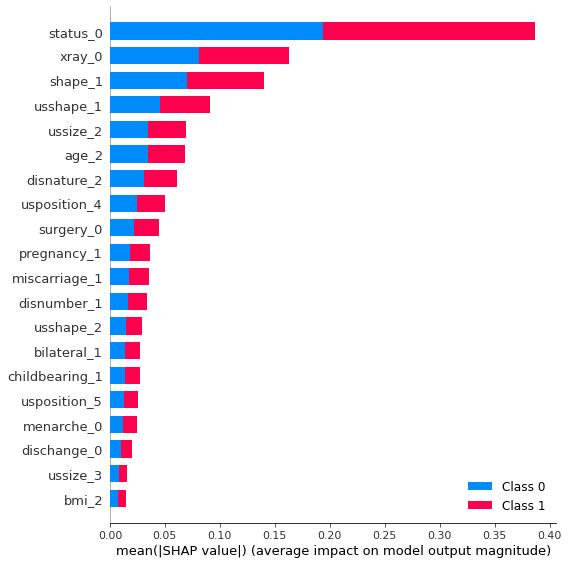

In [13]:
interpret_model(dt)

In [16]:
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [17]:
pred_holdout = predict_model(dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Decision Tree Classifier,0.7963,0.7974,0.8,0.6,0.6857,0.5395


In [18]:
from pycaret.clustering import *
clusterdata = setup(data, normalize = True, session_id=42)


Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Original Data,"(355, 41)"
2,Missing Values,False
3,Numeric Features,0
4,Categorical Features,41
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(355, 114)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


In [19]:
kmeans = create_model('kmeans', num_clusters = 5)
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)


In [20]:
kmean_results = assign_model(kmeans)
kmean_results.head()

,malignant,bilateral,age,month,bmi,diabetes,hypertension,surgery,smoking,family,...,ussize,usposition,usdistance,usshape,usboundary,bloodflow,calcification,birads,xray,Cluster
0,1,0,0,1,2,0,0,0,0,0,...,3,2,1,2,1,1,0,1,0,Cluster 4
1,1,1,1,1,1,0,1,1,0,0,...,1,1,1,1,1,1,0,1,0,Cluster 3
2,1,0,2,0,2,0,0,0,1,0,...,3,1,1,2,2,2,0,2,0,Cluster 2
3,1,0,1,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Cluster 0
4,1,0,2,0,2,1,1,0,0,0,...,1,5,1,1,1,1,0,2,0,Cluster 1


In [21]:
plot_model(kmeans)

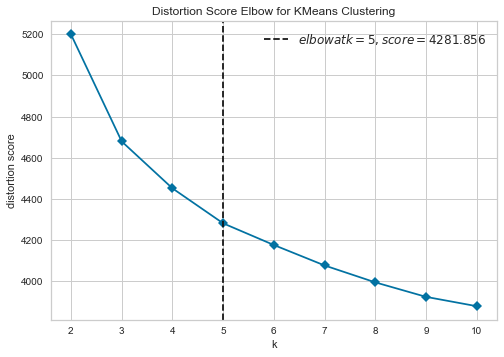

In [22]:
plot_model(kmeans, plot = 'elbow')

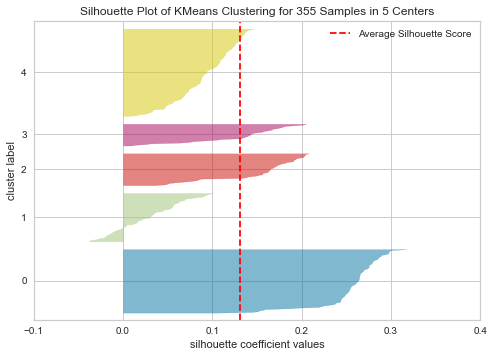

In [23]:
plot_model(kmeans, plot = 'silhouette')

In [24]:
plot_model(kmeans, plot = 'distribution')

In [25]:
plot_model(kmeans, plot = 'distribution', feature = 'malignant')

In [26]:
data.columns

Index(['malignant', 'bilateral', 'age', 'month', 'bmi', 'diabetes',
       'hypertension', 'surgery', 'smoking', 'family', 'menarche', 'menopause',
       'miscarriage', 'pregnancy', 'childbearing', 'disnature', 'dischange',
       'disnumber', 'intraductalmass', 'position', 'distance', 'shape',
       'surface', 'status', 'quantity', 'distribution', 'retraction',
       'appearance', 'ductectasia', 'numintramass', 'numcysmass', 'nummass',
       'ussize', 'usposition', 'usdistance', 'usshape', 'usboundary',
       'bloodflow', 'calcification', 'birads', 'xray'],
      dtype='object')

In [27]:
kerasdata = pd.DataFrame()

kerasdata['malignant'] = data['malignant']
    
kerasdata[['bilateral','diabetes','hypertension']] = data[['bilateral','diabetes','hypertension']]

kerasdata[['surgery', 'smoking', 'family','menopause']] = data[['surgery', 'smoking', 'family','menopause']]
                              
kerasdata[['dischange', 'disnumber','intraductalmass','distance','ductectasia','calcification','xray']] = data[['dischange', 'disnumber','intraductalmass','distance','ductectasia','calcification','xray']]
                              
classname = ['bmi','menarche','miscarriage','pregnancy','childbearing','disnature', 'position',  'shape', 'surface', 'status', 'quantity',  'appearance', 'numintramass', 'numcysmass', 
             'nummass', 'ussize', 'usposition', 'usdistance', 'usshape', 'usboundary', 'bloodflow', 'birads']

In [28]:
for colname in data.columns:
    if colname not in classname:
        df = pd.get_dummies(data[colname])
        df.columns = [colname + '-' + str(name) for name in df.columns ]
        kerasdata = pd.concat([kerasdata,df],axis = 1)
kerasdata

,malignant,bilateral,diabetes,hypertension,surgery,smoking,family,menopause,dischange,disnumber,...,distribution-1,distribution-2,retraction-0,retraction-1,ductectasia-0,ductectasia-1,calcification-0,calcification-1,xray-0,xray-1
0,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,0,1,0
1,1,1,0,1,1,0,0,0,0,1,...,0,1,1,0,0,1,1,0,1,0
2,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,1,0,1,0
3,1,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,1,0
4,1,0,1,1,0,0,0,1,0,0,...,1,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,1,1,0,1,0
351,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,1,0,1,0
352,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
353,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,1,0


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
seed = 42
testsize = 0.2
kfold = StratifiedKFold(n_splits=10, random_state =seed, shuffle=True)
X, y = kerasdata.values[:,1:], kerasdata.values[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=seed)

In [30]:
X_train.shape

(284, 55)

In [31]:
from keras import models,layers

model = models.Sequential()
model.add(layers.Dense(30,activation = 'relu',input_shape=(55,)))
model.add(layers.Dense(30,activation = 'relu' ))
# model.add(layers.Dense(30,activation = 'relu' ))
# model.add(layers.Dense(10,activation = 'relu' ))
# model.add(layers.Dense(10,activation = 'relu' ))
# model.add(layers.Dense(10,activation = 'relu' ))
# model.add(layers.Dense(10,activation = 'relu' ))
model.add(layers.Dense(1,activation = 'sigmoid' ))

# 二分类问题选择二元交叉熵损失函数
model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                1680      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 2,641
Trainable params: 2,641
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = model.fit(X_train,y_train,
                    batch_size= 64,
                    epochs= 50,
                    validation_split=0.2 #分割一部分训练数据用于验证
                   )

Train on 227 samples, validate on 57 samples
Epoch 1/50
227/227 [==============================] - 0s 646us/step - loss: 0.6280 - accuracy: 0.7489 - val_loss: 0.5902 - val_accuracy: 0.7368
Epoch 2/50
227/227 [==============================] - 0s 35us/step - loss: 0.5676 - accuracy: 0.7797 - val_loss: 0.5564 - val_accuracy: 0.7368
Epoch 3/50
227/227 [==============================] - 0s 35us/step - loss: 0.5208 - accuracy: 0.7709 - val_loss: 0.5333 - val_accuracy: 0.7018
Epoch 4/50
227/227 [==============================] - 0s 44us/step - loss: 0.4839 - accuracy: 0.7709 - val_loss: 0.5136 - val_accuracy: 0.7018
Epoch 5/50
227/227 [==============================] - 0s 44us/step - loss: 0.4557 - accuracy: 0.7709 - val_loss: 0.4914 - val_accuracy: 0.7018
Epoch 6/50
227/227 [==============================] - 0s 40us/step - loss: 0.4300 - accuracy: 0.7753 - val_loss: 0.4645 - val_accuracy: 0.7018
Epoch 7/50
227/227 [==============================] - 0s 53us/step - loss: 0.4057 - accuracy: 0.

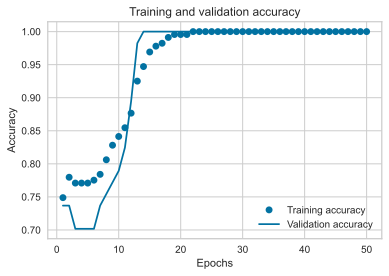

In [33]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
y_pred = model.predict_classes(X_test)

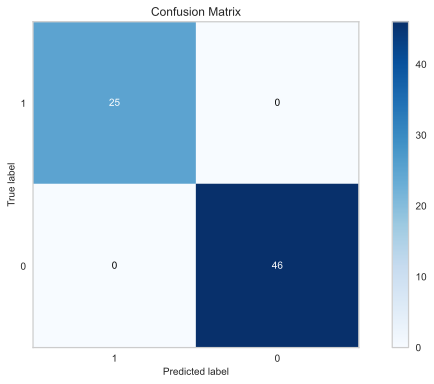

In [35]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, labels=[1,0], figsize=(12,6));